In [ ]:
! pip install transformers
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.8 MB/s 
     |████████████████████████████████| 6.6 MB 48.2 MB/s 
     |████████████████████████████████| 101 kB 2.4 MB/s 
     |████████████████████████████████| 596 kB 67.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 7.0 MB/s 
     |████████████████████████████████| 212 kB 65.7 MB/s 
     |████████████████████████████████| 1.1 MB 66.3 MB/s 
     |████████████████████████████████| 140 kB 74.6 MB/s 
     |████████████████████████████████| 127 kB 44.0 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 271 kB 77.5 MB/s 
     |██████████████

In [ ]:
import tensorflow as tf
import transformers
from transformers import DistilBertTokenizer, TFBertModel, TFDistilBertForMultipleChoice
from transformers import TFDistilBertForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TFGPT2ForSequenceClassification, TFRobertaForSequenceClassification

import json

MODEL_NAME = 'distilbert-base-uncased'
#MODEL_NAME = 'huggingface/CodeBERTa-small-v1'
BATCH_SIZE = 16
N_EPOCHS = 3


In [ ]:
task2_x = []
task2_y = []
task2_test_x = []
task2_test_y = []

with open("train_x.txt", 'r') as f:
  for line in f:
    task2_x.append(line)


with open("train_y.txt", 'r') as f:
  for line in f:
    task2_y.append(line)


with open("test_x.txt", 'r') as f:
  for line in f:
    task2_test_x.append(line)


with open("test_y.txt", 'r') as f:
  for line in f:
    task2_test_y.append(line)


print(len(task2_x), len(task2_y),len(task2_test_x),len(task2_test_y))

1816 1816 202 202


In [ ]:
tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
#tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
#model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=15, batch_size=BATCH_SIZE)



Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
print(test_dataset2)

In [ ]:
# 5 epochs

In [ ]:
tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
#tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
#model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)


# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=5, batch_size=BATCH_SIZE)


Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

Epoch 1/5
114/114 [==============================] - 109s 872ms/step - loss: 0.7705 - accuracy: 0.6993
Epoch 2/5
114/114 [==============================] - 103s 905ms/step - loss: 0.6838 - accuracy: 0.7373
Epoch 3/5
114/114 [==============================] - 103s 906ms/step - loss: 0.6793 - accuracy: 0.7324
Epoch 4/5
114/114 [==============================] - 103s 907ms/step - loss: 0.6568 - accuracy: 0.7428
Epoch 5/5
114/114 [==============================] - 103s 907ms/step - loss: 0.6289 - accuracy: 0.7467


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.86      0.32      0.47        37
           1       0.73      0.99      0.84       139
           2       0.00      0.00      0.00        26

    accuracy                           0.74       202
   macro avg       0.53      0.44      0.44       202
weighted avg       0.66      0.74      0.66       202



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

0.7376237623762376


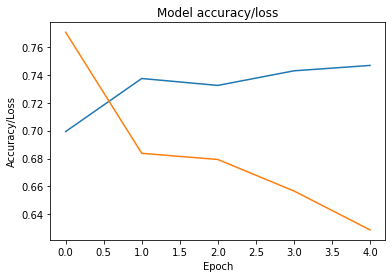

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# 10 epochs

In [ ]:
tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
#tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
#model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)


# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=10, batch_size=BATCH_SIZE)


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
114/114 [==============================] - 119s 984ms/step - loss: 0.7404 - accuracy: 0.7203
Epoch 2/10
114/114 [==============================] - 112s 983ms/step - loss: 0.6593 - accuracy: 0.7285
Epoch 3/10
114/114 [==============================] - 112s 984ms/step - loss: 0.5982 - accuracy: 0.7439
Epoch 4/10
114/114 [==============================] - 112s 983ms/step - loss: 0.5625 - accuracy: 0.7594
Epoch 5/10
114/114 [==============================] - 112s 983ms/step - loss: 0.4715 - accuracy: 0.7930
Epoch 6/10
114/114 [==============================] - 112s 982ms/step - loss: 0.4234 - accuracy: 0.8227
Epoch 7/10
114/114 [==============================] - 112s 983ms/step - loss: 0.3590 - accuracy: 0.8519


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# 20 epochs

In [ ]:
tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
#tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
#model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)


# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=20, batch_size=BATCH_SIZE)


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20
114/114 [==============================] - 120s 987ms/step - loss: 0.7520 - accuracy: 0.7109
Epoch 2/20
114/114 [==============================] - 112s 984ms/step - loss: 0.6834 - accuracy: 0.7291
Epoch 3/20
114/114 [==============================] - 113s 988ms/step - loss: 0.6347 - accuracy: 0.7412
Epoch 4/20
114/114 [==============================] - 112s 985ms/step - loss: 0.6066 - accuracy: 0.7445
Epoch 5/20
114/114 [==============================] - 112s 985ms/step - loss: 0.5185 - accuracy: 0.7924
Epoch 6/20
114/114 [==============================] - 113s 988ms/step - loss: 0.4518 - accuracy: 0.8106
Epoch 7/20
114/114 [==============================] - 112s 985ms/step - loss: 0.3937 - accuracy: 0.8199
Epoch 8/20
114/114 [==============================] - 112s 984ms/step - loss: 0.2890 - accuracy: 0.8827
Epoch 9/20
114/114 [==============================] - 112s 984ms/step - loss: 0.2277 - accuracy: 0.9108
Epoch 10/20
114/114 [==============================] - 113s 988m

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.54      0.57      0.56        35
           1       0.80      0.83      0.81       134
           2       0.42      0.33      0.37        33

    accuracy                           0.70       202
   macro avg       0.59      0.58      0.58       202
weighted avg       0.69      0.70      0.70       202



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

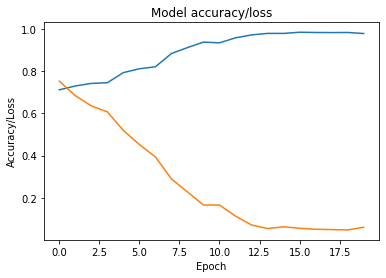

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# 25 epochs

In [ ]:
tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
#tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))

model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
#model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)


# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=25, batch_size=BATCH_SIZE)


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/25
114/114 [==============================] - 120s 992ms/step - loss: 0.7155 - accuracy: 0.7285
Epoch 2/25
114/114 [==============================] - 112s 984ms/step - loss: 0.6665 - accuracy: 0.7291
Epoch 3/25
114/114 [==============================] - 112s 983ms/step - loss: 0.6343 - accuracy: 0.7483
Epoch 4/25
114/114 [==============================] - 113s 989ms/step - loss: 0.5877 - accuracy: 0.7588
Epoch 5/25
114/114 [==============================] - 112s 986ms/step - loss: 0.5178 - accuracy: 0.7792
Epoch 6/25
114/114 [==============================] - 113s 989ms/step - loss: 0.4544 - accuracy: 0.8056
Epoch 7/25
114/114 [==============================] - 113s 991ms/step - loss: 0.3663 - accuracy: 0.8557
Epoch 8/25
114/114 [==============================] - 113s 990ms/step - loss: 0.3195 - accuracy: 0.8678
Epoch 9/25
114/114 [==============================] - 113s 990ms/step - loss: 0.2278 - accuracy: 0.9069
Epoch 10/25
114/114 [==============================] - 113s 989m

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.41      0.60      0.48        25
           1       0.80      0.87      0.83       128
           2       0.62      0.33      0.43        49

    accuracy                           0.70       202
   macro avg       0.61      0.60      0.58       202
weighted avg       0.71      0.70      0.69       202



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

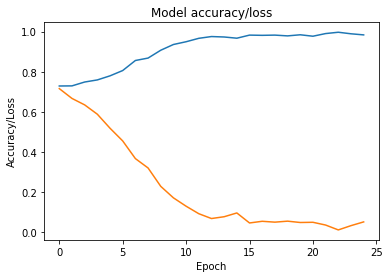

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()